In [11]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

In [12]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
!python -m spacy download ru_core_news_sm

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/v.makshanchikov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/v.makshanchikov/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/v.makshanchikov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Using cached https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.8.0/ru_core_news_sm-3.8.0-py3-none-any.whl (15.3 MB)
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [13]:
files = ["soltwine1.txt", "soltwine2.txt", "soltwine3.txt"]

texts = []
for file in files:
    with open(file, "r", encoding="utf-8") as f:
        texts.append(f.read())

texts

['Мне не хочется знать о том, как у тебя дела\nНо ты выглядишь так привлекательно\nДля тебя всё сегодня бесплатно\nЕдь ко мне сразу без платья\nМог бы соврать, но я не столько хочу тебя\nСколько просто ищу тепла\nЯ бы мог написать другой\nТы просто была под рукой\nПриезжай уже, ты такая же\nНам обоим плевать, что у нас в душе\nТы сама намекала на это же\nПозвони мне, как будешь на этаже\nЕсли будет паршиво, мы снова друг другу напишем и поможем\nПереспим, а потом я скажу, как тоскую по бывшей, ты же тоже?\nНам покажется, будто сейчас мы становимся ближе, не похоже\nПереспим, а потом я скажу, как тоскую по бывшей, ты же тоже? Ты же тоже?\nЕсли ты едешь ко мне не ищи во мне принца\nНа белом коне или рыцаря\nВ планах на вечер напиться\nЧтоб усыпить свои взгляды и принципы\nТак веселей будет падать ко дну\nВедь ничего не стоит на кону\nИ мы ничего не должны никому\nНо откуда я чувствую стыд и вину?\nБезобидная шалость:\nПо бокалу — и можем раздеться\nНо в груди заболело и сжалось\nЧто-то в

In [14]:
def preprocess(text):
    # Нижний регистр
    text = text.lower()
    
    # Удаление всего кроме букв
    text = re.sub(r"[^а-яё\s]", " ", text)
    
    # Обработка через spaCy
    doc = nlp(text)
    
    tokens = []
    for token in doc:
        # Убираем стоп-слова, пунктуацию, пробелы и короткие слова
        if (
            not token.is_stop
            and not token.is_punct
            and not token.is_space
            and len(token.lemma_) > 2
        ):
            tokens.append(token.lemma_)
    
    return " ".join(tokens)

In [16]:
for i, text in enumerate(texts):
    print(f"Песня {i+1}: {len(text.split())} слов до очистки")

nlp = spacy.load("ru_core_news_sm")
cleaned_texts = [preprocess(text) for text in texts]

# Проверка размера текстов
for i, text in enumerate(cleaned_texts):
    print(f"Песня {i+1}: {len(text.split())} слов после очистки")

cleaned_texts

Песня 1: 258 слов до очистки
Песня 2: 366 слов до очистки
Песня 3: 231 слов до очистки
Песня 1: 97 слов после очистки
Песня 2: 157 слов после очистки
Песня 3: 107 слов после очистки


['хотеться знать дело выглядеть привлекательно сегодня бесплатно едь платье соврать столько искать тепло написать рука приезжай оба плевать душа намекать позвонить этаж паршиво друг другу написать поможем переспать сказать тоскую бывший показаться становиться близкий похожий переспать сказать тоскую бывший ехать искать принц белый конь рыцарь план вечер напиться усыпить взгляд принцип веселей падать дно стоить кон чувствовать стыд вина безобидный шалость бокал раздеться грудь заболеть сжалось область сердце страсть жалость загадка становиться гадко недочёт идеальный план недостаточно пьяный пойти добавка паршиво друг другу написать поможем переспать сказать тоскую бывший показаться становиться близкий похожий переспать сказать тоскую бывший',
 'молодец бывший отличный вкус школа красный аттестат столичный вуз удивиться готовиться детство думать легко влюблюсь проходить бюджет ходить послушно пара сто год поить копейка барин местный уверенный стать известный постоянно пить писать песня 

- Объём текстов сократился примерно на 55–65%.
- Это означает, что:
- стоп-слова удалены корректно,
- лемматизация работает,
- шум (частицы, союзы, повторы) устранён.

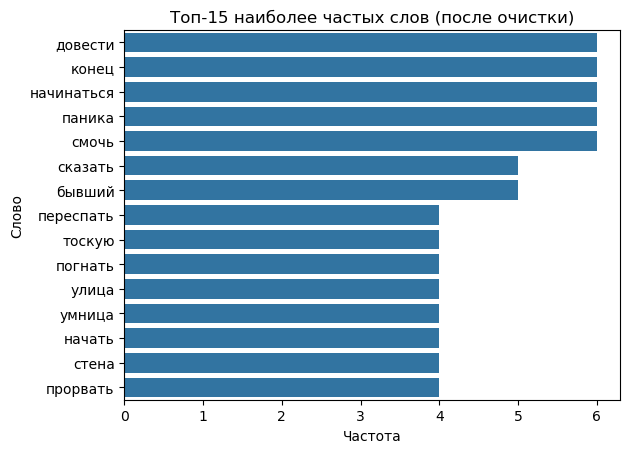

In [19]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Объединяем тексты в один корпус
all_tokens = " ".join(cleaned_texts).split()

word_counts = Counter(all_tokens)

# Топ-15 слов
top_words = word_counts.most_common(15)

df_top = pd.DataFrame(top_words, columns=["Слово", "Частота"])

plt.figure()
sns.barplot(data=df_top, x="Частота", y="Слово")
plt.title("Топ-15 наиболее частых слов (после очистки)")
plt.show()